# Credit EDA Case Study-Application Dataset

In [2]:
#importing necessary libraries and importing the dataset from desired location
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('C:/Users/Gaurav/Desktop/Datasets/Credit Project/application_data.csv')
#df=pd.read_csv('C:/Users/gaurav.yewale/Desktop/EEEdhule/Credit EDA Case Study/application_data.csv')

In [1]:
df.info()

NameError: name 'df' is not defined

As the Dataset has got 122 columns we are unable to see the info

In [3]:
#we will check the first 5 rows just to have a look at the Datset
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#the next thing we will do is check for null values column wise
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [27]:
#check the percentage of null values,checking the first 60 columns
df.iloc[:,:60].isnull().sum()/len(df.index)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                    65.990810
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

In [28]:
#removing missing values greater than 50% in columns--as there are some columns which hav
#missing values near to 50% so we are setting the missing criteria to 47%
pct_null = df.isnull().sum() / len(df)
missing_features = pct_null[pct_null > 0.50].index
df.drop(missing_features, axis=1, inplace=True)

In [36]:
#check the percentage of null values,checking the first 60 columns agian
#as there are some columns which have near to 50% missing valus we would remove those too
df.iloc[:,:60].isnull().sum()/len(df.index)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [3]:
#removing missing values greater than 47% in columns
pct_null = df.isnull().sum() / len(df)
missing_features = pct_null[pct_null > 0.47].index
df.drop(missing_features, axis=1, inplace=True)

In [4]:
#checing the number of cateogries present in NAME_TYPE_SUITE column
df['NAME_TYPE_SUITE'].value_counts()


Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

We will replace the NAME_TYPE_SUITE with Mode of that column

In [5]:
#using mode to replace null values
df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].mode()[0], inplace=True)
df['NAME_TYPE_SUITE'].value_counts()


Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [6]:
#checking the statistics for below columns
df[['AMT_GOODS_PRICE','EXT_SOURCE_2']].describe().T

,count,mean,std,min,25%,50%,75%,max
AMT_GOODS_PRICE,307233.0,538396.207429,369446.46054,4.050000e+04,238500.000000,450000.000000,679500.000000,4050000.000
EXT_SOURCE_2,306851.0,0.514393,0.19106,8.173617e-08,0.392457,0.565961,0.663617,0.855


The difference between the mean and the median (lower the better), and the variation from 25th to 75th percentile (quite small in this case).
Thus, let's impute the missing values by the mean value of AMT_GOODS_PRICE and EXT_SOURCE_2 respectively.

In [7]:
#using mean replacing null values
df.loc[np.isnan(df['AMT_GOODS_PRICE']), ['AMT_GOODS_PRICE']] = df['AMT_GOODS_PRICE'].mean()
df.loc[np.isnan(df['EXT_SOURCE_2']), ['EXT_SOURCE_2']] = df['EXT_SOURCE_2'].mean()

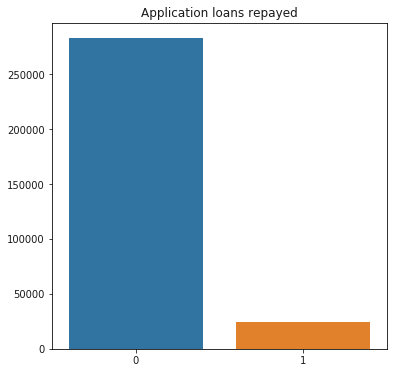

In [8]:
#ploting the target varibale 
temp = df["TARGET"].value_counts()
df_T = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed')
sns.set_color_codes("pastel")
sns.barplot(x = temp.index, y=temp.values, data=df)
locs, labels = plt.xticks()
plt.show()

In [41]:
#there are still some null values reamined in the dataset
#for now  we will straigt away reomve the null values
df_nonull=df.dropna()
df_nonull.iloc[:,:60].isnull().sum()/len(df_nonull.index)*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS     

In [10]:
#Finding the Ratio of Target variable
(df_nonull['TARGET'].value_counts()/len(df_nonull['TARGET'].index))*100

0    91.540732
1     8.459268
Name: TARGET, dtype: float64

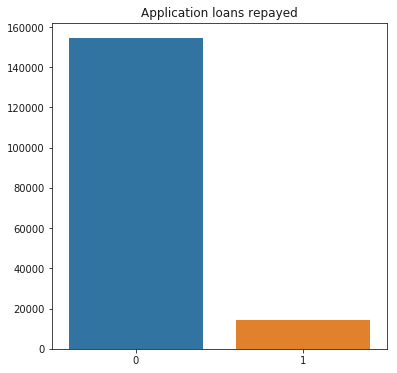

In [18]:
#after removing all the null values checking the Target varibale again.
temp = df_nonull["TARGET"].value_counts()
df_T2 = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed')
sns.set_color_codes("pastel")
sns.barplot(x = temp.index, y=temp.values, data=df)
locs, labels = plt.xticks()
plt.show()

We can clearly see that there is a Class Imbalance Problem with the target variable

In [22]:
#checking the summary statictis for some columns to check outliers
df_nonull[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','CNT_CHILDREN','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_ID_PUBLISH','DAYS_EMPLOYED','DAYS_REGISTRATION']].describe().T

,count,mean,std,min,25%,50%,75%,max
AMT_INCOME_TOTAL,168738.0,179096.702061,303551.444817,26550.0,112500.00,157500.0,225000.0,117000000.0
AMT_CREDIT,168738.0,620729.363955,408611.456605,45000.0,284400.00,528633.0,835605.0,4050000.0
AMT_ANNUITY,168738.0,27891.026402,14464.318010,1980.0,17217.00,26014.5,35685.0,258025.5
CNT_CHILDREN,168738.0,0.512647,0.769343,0.0,0.00,0.0,1.0,19.0
AMT_GOODS_PRICE,168738.0,557586.695939,374748.321567,40500.0,247500.00,454500.0,702000.0,4050000.0
DAYS_BIRTH,168738.0,-14876.485095,3594.864088,-25200.0,-17601.75,-14688.0,-11969.0,-7676.0
DAYS_ID_PUBLISH,168738.0,-2871.611018,1500.781393,-7197.0,-4216.00,-2990.0,-1594.0,0.0
DAYS_EMPLOYED,168738.0,-2469.153759,2553.921340,-17912.0,-3294.00,-1719.0,-806.0,365243.0
DAYS_REGISTRATION,168738.0,-4636.211802,3247.769804,-22928.0,-6954.00,-4272.0,-1837.0,0.0


#### As per my knowledge Outliers are present in below columns:
1. AMT_INCOME_TOTAL: As max amount is way above the mean and 75th percentile hence i will consider there are outliers present in this column
2. DAYS_EMPLOYED: there is one value which is presnt here 365243.It might be due to manual error while data entry plus all the values in this column are negative except for this value,hence we will trat this as an outlier
3. CNT_CHILDREN-Here also there is one value 19 as per humnas cannot have so many childrens hence we will also condier this is an outlier: 

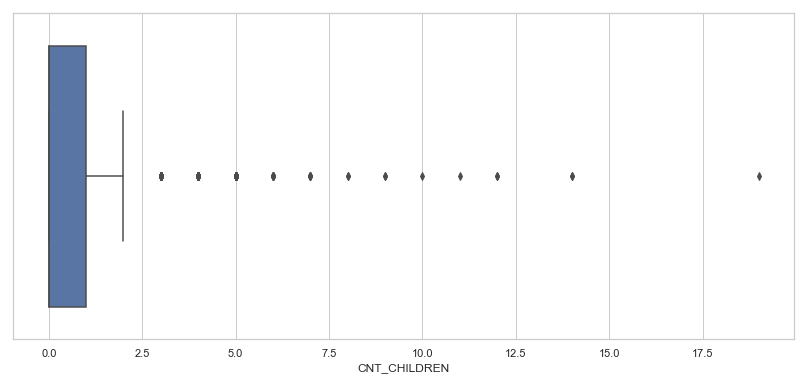

In [24]:
#ploting boxplot to check outliers
import seaborn as sns
plt.figure(figsize=(14,6))
sns.set(style="whitegrid")
sns.boxplot(x=df_nonull["CNT_CHILDREN"])

#### For now we will not remove the outliers from CNT_CHILDREN as doing so would remove all the values beyond 2 and count of children can be 5 or 6

In [11]:
#WE will create a function remove outliers to handle outliers

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


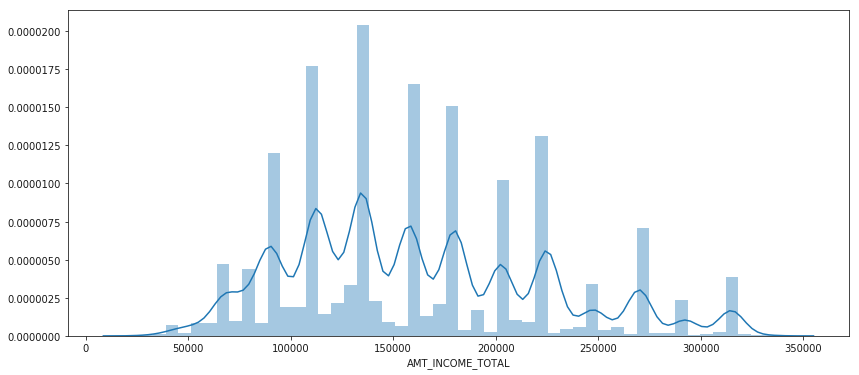

In [12]:
#We will reomve the Outliers using our built in function and plot the histogram after that
df_1=remove_outlier(df_nonull,'AMT_INCOME_TOTAL')
data=remove_outlier(df_1, 'AMT_INCOME_TOTAL')
plt.figure(figsize=(14,6))
sns.distplot(data['AMT_INCOME_TOTAL'], hist=True, rug=False)

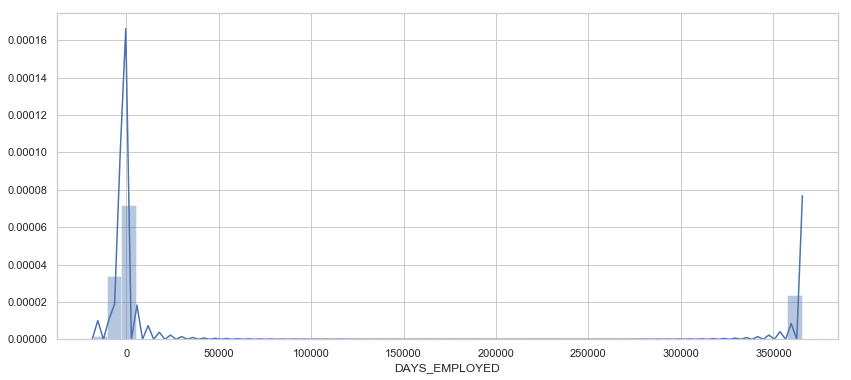

In [30]:
#Before removing outliers from the below column
plt.figure(figsize=(14,6))
sns.distplot(df['DAYS_EMPLOYED'], hist=True, rug=False)

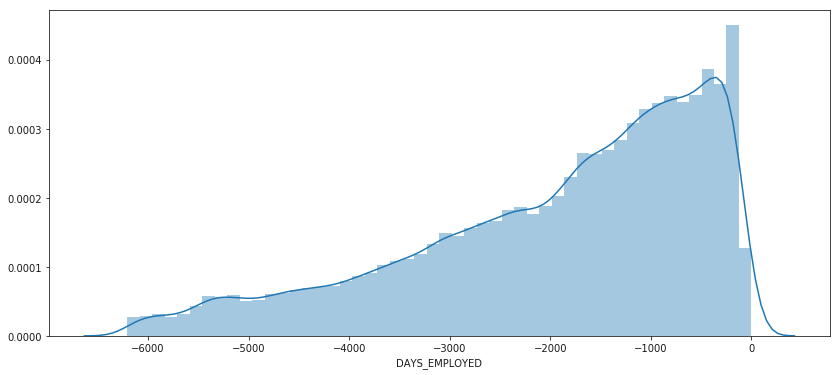

In [29]:
#removing Outliers for Days employed and ploting histogram for the same
df_2=remove_outlier(df_nonull,'DAYS_EMPLOYED')
data=remove_outlier(df_2, 'DAYS_EMPLOYED')
plt.figure(figsize=(14,6))
sns.distplot(data['DAYS_EMPLOYED'], hist=True, rug=False)

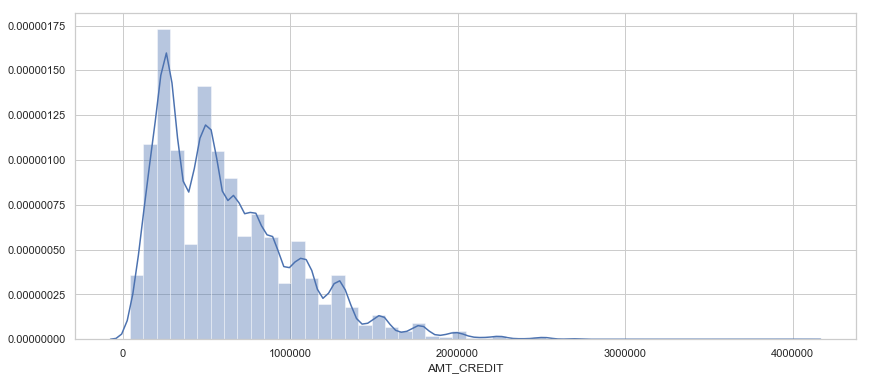

In [32]:
#ploting histogram for Amt_credit
plt.figure(figsize=(14,6))
sns.distplot(df_nonull['AMT_CREDIT'], hist=True, rug=False)

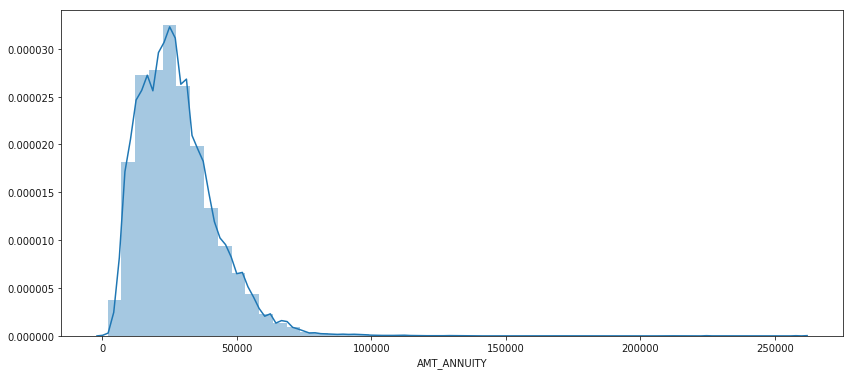

In [20]:
# ploting histogram for AMT_ANNUITY
plt.figure(figsize=(14,6))
sns.distplot(df_nonull['AMT_ANNUITY'], hist=True, rug=False)

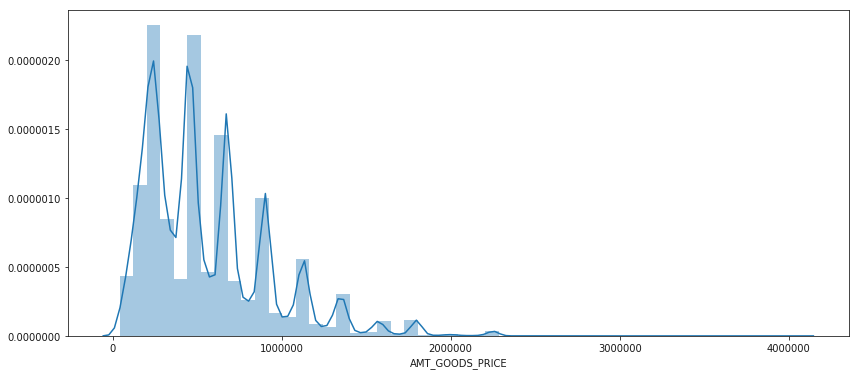

In [21]:
## ploting histogram for AMT_GOODS_PRICE
plt.figure(figsize=(14,6))
sns.distplot(df_nonull['AMT_GOODS_PRICE'], hist=True, rug=False)

In [ ]:

#We will create new columns
#creatin new varibales from days
#Create a function and then apply it on desired column with the use of lambda function
def C_days(x):
    
    return x/-365

df_nonull['Age_d']=df_nonull.apply(lambda x:C_days(x['DAYS_BIRTH']),axis=1)
df_nonull['ID_PUBLISH_d']=df_nonull.apply(lambda x:C_days(x['DAYS_ID_PUBLISH']),axis=1)
df_nonull['EMPLOYED_d']=df_nonull.apply(lambda x:C_days(x['DAYS_EMPLOYED']),axis=1)                           
df_nonull['Registeration_d']=df_nonull.apply(lambda x:C_days(x['DAYS_REGISTRATION']),axis=1)

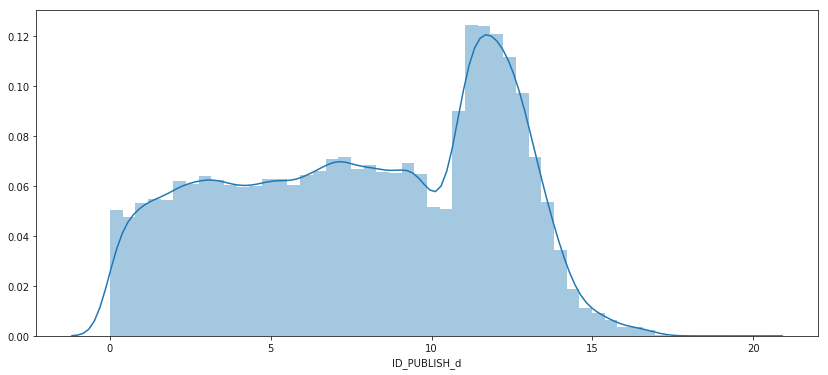

In [16]:
#removing Outliers for ID_PUBLISH_d and ploting histogram for the same
data=remove_outlier(df_nonull, 'ID_PUBLISH_d')
plt.figure(figsize=(14,6))
sns.distplot(data['ID_PUBLISH_d'], hist=True, rug=False)

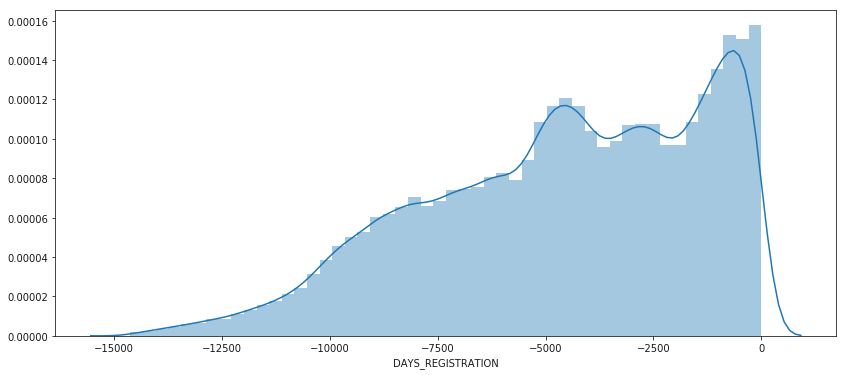

In [28]:
#removing Outliers for DAYS_REGISTRATION and ploting histogram for the same
data=remove_outlier(df_nonull, 'DAYS_REGISTRATION')
plt.figure(figsize=(14,6))
sns.distplot(data['DAYS_REGISTRATION'], hist=True, rug=False)

Text(0.5,1,'Family Members count')

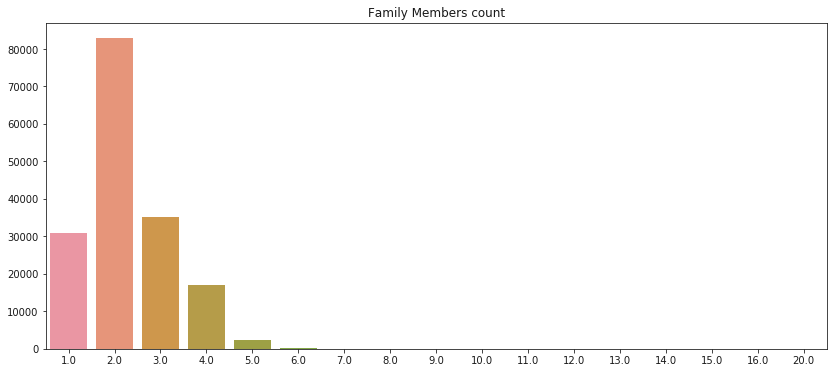

In [18]:
#How many Family Members does the applicants has
plt.figure(figsize=(14,6))
temp = df_nonull['CNT_FAM_MEMBERS'].value_counts()
sns.barplot(x=temp.index, y=temp.values)
plt.title('Family Members count')

In [ ]:
#segregating dataframe w.r.t Target variable
#But we will not be using serated dataframes instead we will use the frequency of the target variable and do the analysis 
not_fraud=df_nonull[df_nonull.TARGET==0]
fraud=df_nonull[df_nonull.TARGET==1]

<Figure size 432x288 with 0 Axes>

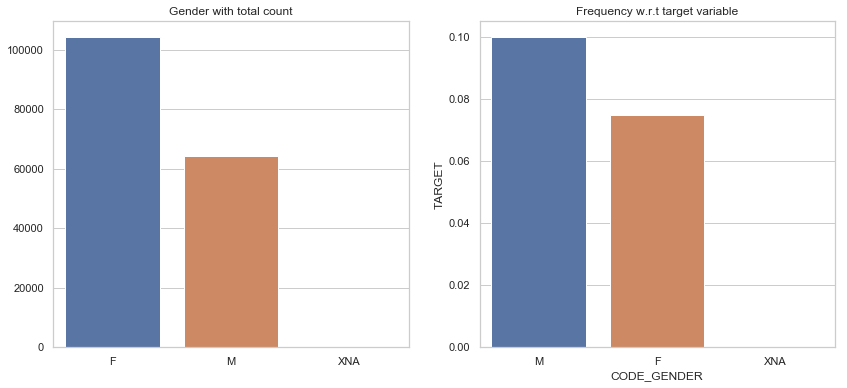

In [34]:
#Doing bivariate analysis for CODE_GENDER variable with the Targt variable
#using Subplots and ploting frequency w.r.t Target variable(1)
cat_perc = df_nonull[['CODE_GENDER', 'TARGET']].groupby(['CODE_GENDER'],as_index=False).mean()
b=cat_perc.sort_values(by='TARGET', ascending=False)
#sns.barplot(x='CODE_GENDER', y='TARGET',data=b)
temp = df_nonull['CODE_GENDER'].value_counts()
plt.figure(1)
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.title('Gender with total count')
sns.barplot(x=temp.index, y=temp.values)

plt.subplot(122)
plt.title('Frequency w.r.t target variable')
sns.barplot(x='CODE_GENDER', y='TARGET',data=b)
plt.show()


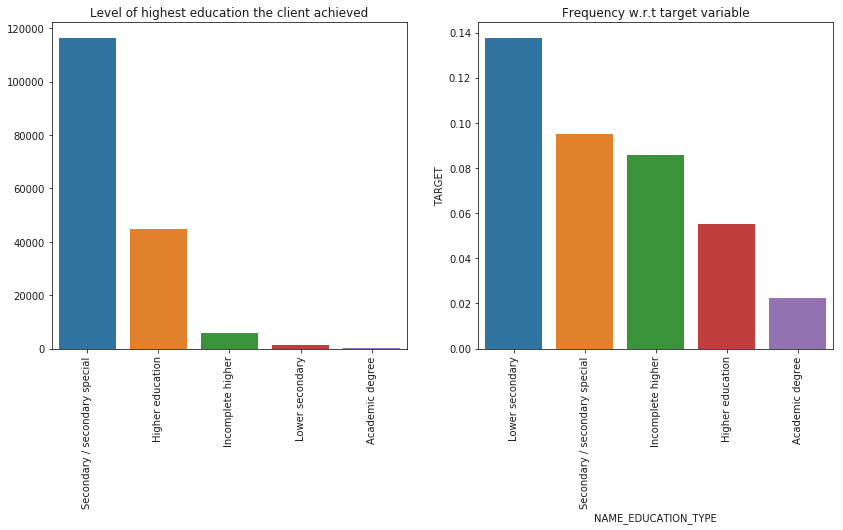

In [19]:
#Doing bivariate analysis for NAME_EDUCATION_TYPE variable with the Targt variable
#using Subplots and ploting frequency w.r.t Target variable(1)
cat_perc = df_nonull[['NAME_EDUCATION_TYPE', 'TARGET']].groupby(['NAME_EDUCATION_TYPE'],as_index=False).mean()
b=cat_perc.sort_values(by='TARGET', ascending=False)
#sns.barplot(x='CODE_GENDER', y='TARGET',data=b)
temp = df_nonull['NAME_EDUCATION_TYPE'].value_counts()
plt.figure(1)
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.title('Level of highest education the client achieved')
sns.barplot(x=temp.index, y=temp.values)
plt.xticks(rotation=90)

plt.subplot(122)
plt.title('Frequency w.r.t target variable')
sns.barplot(x='NAME_EDUCATION_TYPE', y='TARGET',data=b)
plt.xticks(rotation=90)
plt.show()

<Figure size 432x288 with 0 Axes>

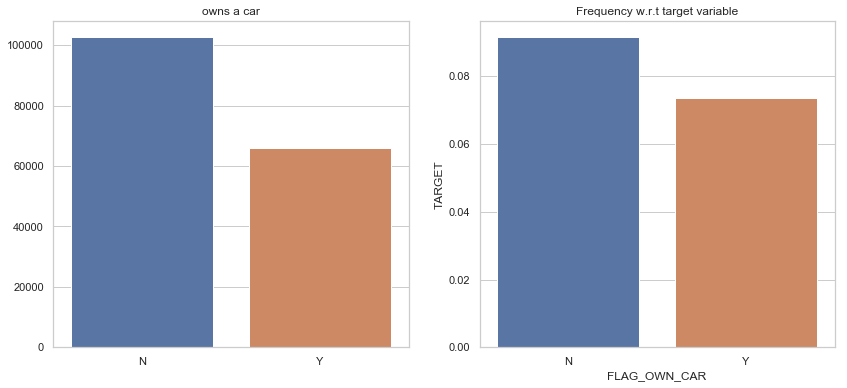

In [36]:
#Doing bivariate analysis for FLAG_OWN_CAR variable with the Targt variable
#using Subplots and ploting frequency w.r.t Target variable(1)
cat_perc = df_nonull[['FLAG_OWN_CAR', 'TARGET']].groupby(['FLAG_OWN_CAR'],as_index=False).mean()
b=cat_perc.sort_values(by='TARGET', ascending=False)
#sns.barplot(x='CODE_GENDER', y='TARGET',data=b)
temp = df_nonull['FLAG_OWN_CAR'].value_counts()
plt.figure(1)
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.title('owns a car')
sns.barplot(x=temp.index, y=temp.values)

plt.subplot(122)
plt.title('Frequency w.r.t target variable')
sns.barplot(x='FLAG_OWN_CAR', y='TARGET',data=b)
plt.show()

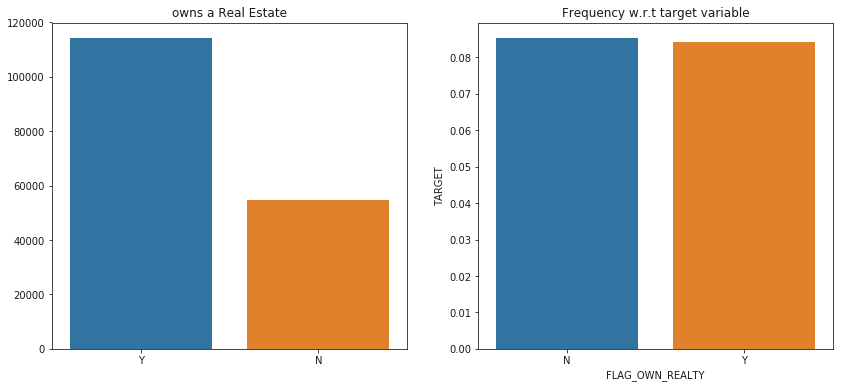

In [14]:
#Doing bivariate analysis for FLAG_OWN_REALTY variable with the Targt variable
#using Subplots and ploting frequency w.r.t Target variable(1)
cat_perc = df_nonull[['FLAG_OWN_REALTY', 'TARGET']].groupby(['FLAG_OWN_REALTY'],as_index=False).mean()
b=cat_perc.sort_values(by='TARGET', ascending=False)
#sns.barplot(x='CODE_GENDER', y='TARGET',data=b)
temp = df_nonull['FLAG_OWN_REALTY'].value_counts()
plt.figure(1)
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.title('owns a Real Estate')
sns.barplot(x=temp.index, y=temp.values)

plt.subplot(122)
plt.title('Frequency w.r.t target variable')
sns.barplot(x='FLAG_OWN_REALTY', y='TARGET',data=b)
plt.show()

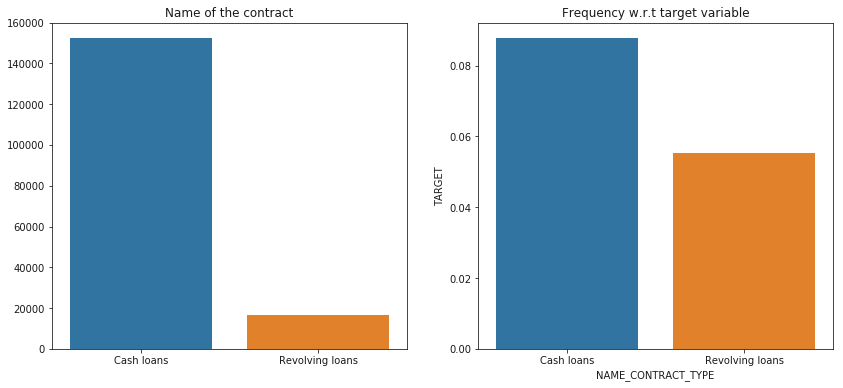

In [15]:
#Doing bivariate analysis for NAME_CONTRACT_TYPE variable with the Target variable
#using Subplots and ploting frequency w.r.t Target variable(1)
cat_perc = df_nonull[['NAME_CONTRACT_TYPE', 'TARGET']].groupby(['NAME_CONTRACT_TYPE'],as_index=False).mean()
b=cat_perc.sort_values(by='TARGET', ascending=False)
#sns.barplot(x='CODE_GENDER', y='TARGET',data=b)
temp = df_nonull['NAME_CONTRACT_TYPE'].value_counts()
plt.figure(1)
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.title('Name of the contract')
sns.barplot(x=temp.index, y=temp.values)


plt.subplot(122)
plt.title('Frequency w.r.t target variable')
sns.barplot(x='NAME_CONTRACT_TYPE', y='TARGET',data=b)
plt.show()

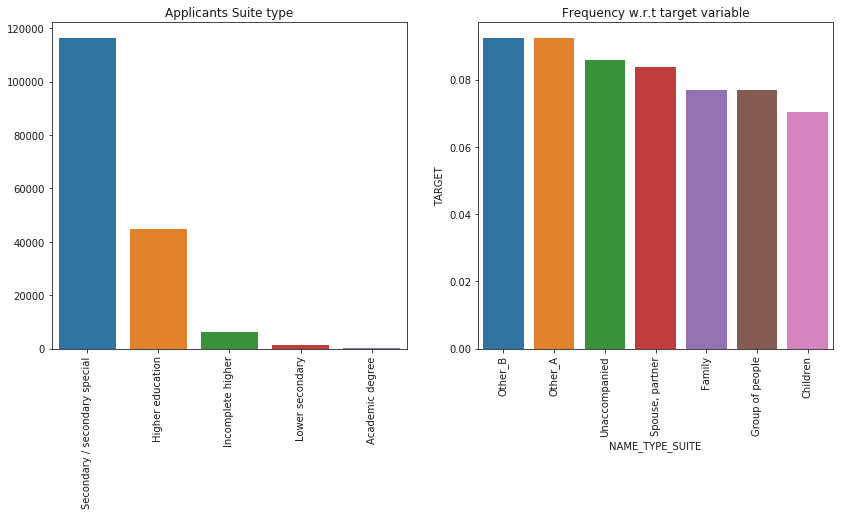

In [20]:
#Doing bivariate analysis for NAME_TYPE_SUITE variable with the Targt variable
#using Subplots
cat_perc = df_nonull[['NAME_TYPE_SUITE', 'TARGET']].groupby(['NAME_TYPE_SUITE'],as_index=False).mean()
b=cat_perc.sort_values(by='TARGET', ascending=False)
#sns.barplot(x='CODE_GENDER', y='TARGET',data=b)
temp = df_nonull['NAME_EDUCATION_TYPE'].value_counts()
plt.figure(1)
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.title('Applicants Suite type')
sns.barplot(x=temp.index, y=temp.values)
plt.xticks(rotation=90)

plt.subplot(122)
plt.title('Frequency w.r.t target variable')
sns.barplot(x='NAME_TYPE_SUITE', y='TARGET',data=b)
plt.xticks(rotation=90)
plt.show()
              

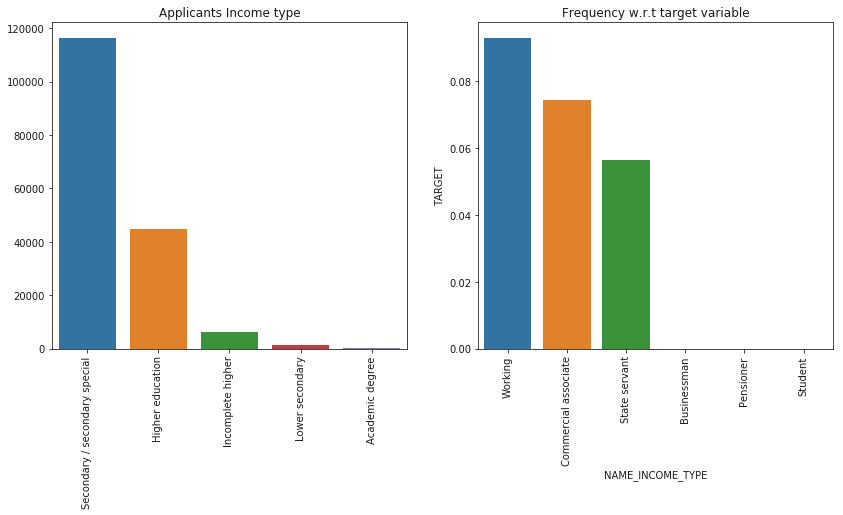

In [21]:
#Doing bivariate analysis for NAME_INCOME_TYPE variable with the Targt variable
#using Subplots
cat_perc = df_nonull[['NAME_INCOME_TYPE', 'TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean()
b=cat_perc.sort_values(by='TARGET', ascending=False)
#sns.barplot(x='CODE_GENDER', y='TARGET',data=b)
temp = df_nonull['NAME_EDUCATION_TYPE'].value_counts()
plt.figure(1)
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.title('Applicants Income type')
sns.barplot(x=temp.index, y=temp.values)
plt.xticks(rotation=90)

plt.subplot(122)
plt.title('Frequency w.r.t target variable')
sns.barplot(x='NAME_INCOME_TYPE', y='TARGET',data=b)
plt.xticks(rotation=90)
plt.show()

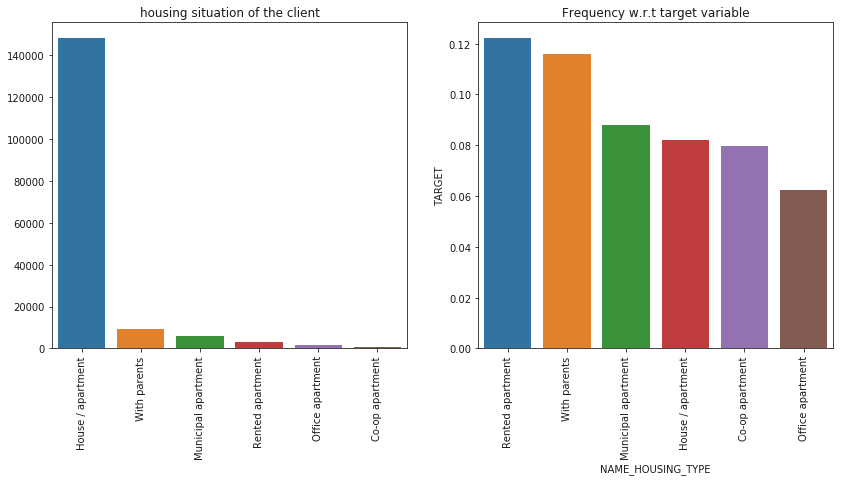

In [22]:
#Doing bivariate analysis for NAME_HOUSING_TYPE variable with the Targt variable
#using Subplots
cat_perc = df_nonull[['NAME_HOUSING_TYPE', 'TARGET']].groupby(['NAME_HOUSING_TYPE'],as_index=False).mean()
b=cat_perc.sort_values(by='TARGET', ascending=False)
#sns.barplot(x='CODE_GENDER', y='TARGET',data=b)
temp = df_nonull['NAME_HOUSING_TYPE'].value_counts()
plt.figure(1)
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.title('housing situation of the client')
sns.barplot(x=temp.index, y=temp.values)
plt.xticks(rotation=90)

plt.subplot(122)
plt.title('Frequency w.r.t target variable')
sns.barplot(x='NAME_HOUSING_TYPE', y='TARGET',data=b)
plt.xticks(rotation=90)
plt.show()

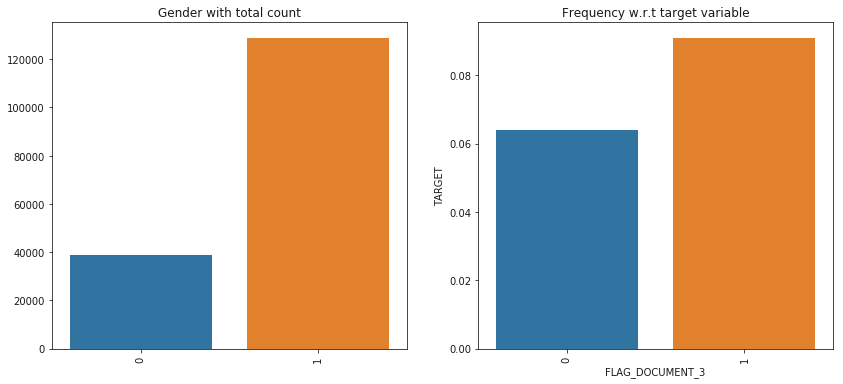

In [27]:
#Doing bivariate analysis for FLAG_DOCUMENT_3 variable with the Targt variable
#using Subplots
cat_perc = df_nonull[['FLAG_DOCUMENT_3', 'TARGET']].groupby(['FLAG_DOCUMENT_3'],as_index=False).mean()
b=cat_perc.sort_values(by='TARGET', ascending=False)
#sns.barplot(x='CODE_GENDER', y='TARGET',data=b)
temp = df_nonull['FLAG_DOCUMENT_3'].value_counts()
plt.figure(1)
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.title('FLAG_DOCUMENT_3')
sns.barplot(x=temp.index, y=temp.values)
plt.xticks(rotation=90)

plt.subplot(122)
plt.title('Frequency w.r.t target variable')
sns.barplot(x='FLAG_DOCUMENT_3', y='TARGET',data=b)
plt.xticks(rotation=90)
plt.show()

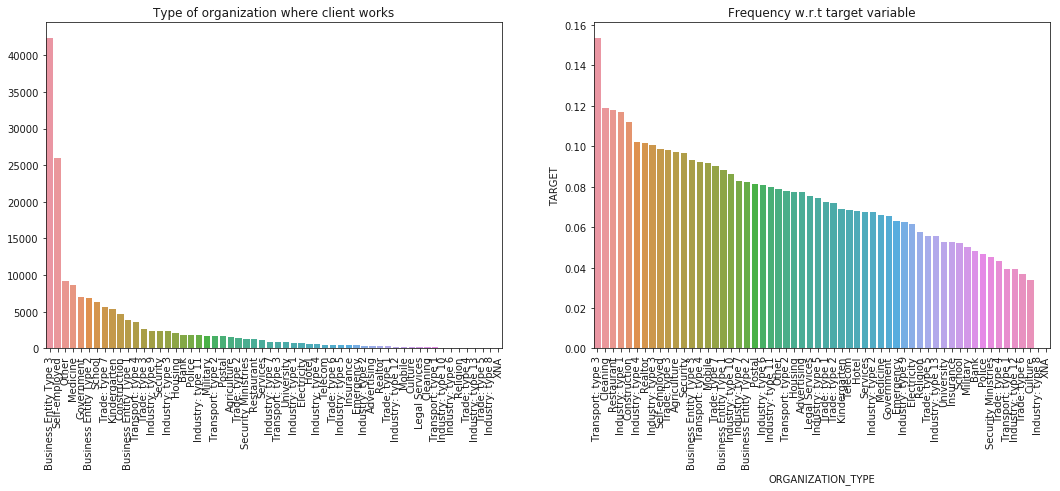

In [27]:
#Doing bivariate analysis for ORGANIZATION_TYPE variable with the Targt variable
#using Subplots
cat_perc = df_nonull[['ORGANIZATION_TYPE', 'TARGET']].groupby(['ORGANIZATION_TYPE'],as_index=False).mean()
b=cat_perc.sort_values(by='TARGET', ascending=False)
#sns.barplot(x='CODE_GENDER', y='TARGET',data=b)
temp = df_nonull['ORGANIZATION_TYPE'].value_counts()
plt.figure(1)
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.title('Type of organization where client works')
sns.barplot(x=temp.index, y=temp.values)
plt.xticks(rotation=90)

plt.subplot(122)
plt.title('Frequency w.r.t target variable')
sns.barplot(x='ORGANIZATION_TYPE', y='TARGET',data=b)
plt.xticks(rotation=90)
plt.show()

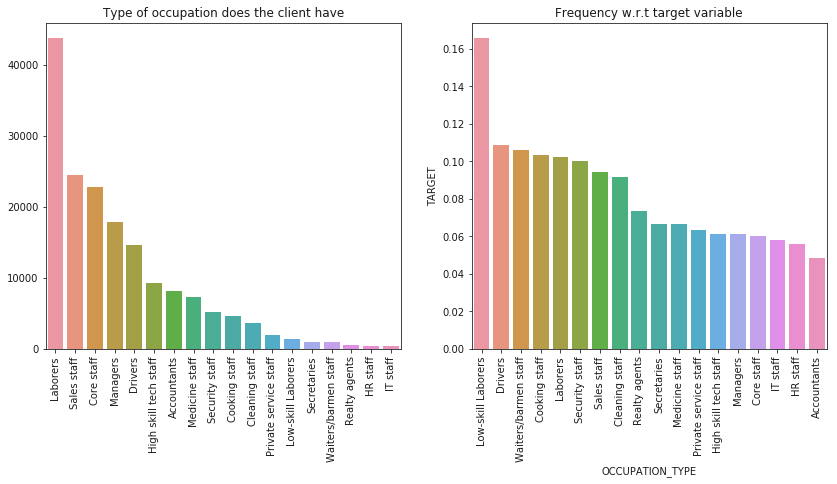

In [23]:
#Doing bivariate analysis for OCCUPATION_TYPE variable with the Targt variable
#using Subplots
cat_perc = df_nonull[['OCCUPATION_TYPE', 'TARGET']].groupby(['OCCUPATION_TYPE'],as_index=False).mean()
b=cat_perc.sort_values(by='TARGET', ascending=False)
#sns.barplot(x='CODE_GENDER', y='TARGET',data=b)
temp = df_nonull['OCCUPATION_TYPE'].value_counts()
plt.figure(1)
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.title('Type of occupation does the client have')
sns.barplot(x=temp.index, y=temp.values)
plt.xticks(rotation=90)

plt.subplot(122)
plt.title('Frequency w.r.t target variable')
sns.barplot(x='OCCUPATION_TYPE', y='TARGET',data=b)
plt.xticks(rotation=90)
plt.show()

In [44]:
#df_nonull.info()
#seperating the numeric variables 
numeric_dtypes=['int64','float64']
cols=(df_nonull.select_dtypes(include=numeric_dtypes).columns)
df_numeric=df_nonull[cols]
#ploting co-realtion w.r.t target variable
#also droping Target variable in the final result
list=df_numeric.drop("TARGET", axis=1).apply(lambda x: x.corr(df_numeric.TARGET))
correlation=list.sort_values(ascending=False)

In [45]:
#top Most Positive Correlations with target variable
correlation.head()


DAYS_EMPLOYED                  0.071049
DAYS_BIRTH                     0.066953
REGION_RATING_CLIENT_W_CITY    0.061690
REGION_RATING_CLIENT           0.059035
DAYS_LAST_PHONE_CHANGE         0.056916
dtype: float64

In [47]:
#top Most Neative Correlations with target variable
correlation.tail(7)

REGION_POPULATION_RELATIVE   -0.036097
AMT_CREDIT                   -0.038297
AMT_GOODS_PRICE              -0.047942
EXT_SOURCE_2                 -0.164536
EXT_SOURCE_3                 -0.180401
FLAG_MOBIL                         NaN
FLAG_DOCUMENT_2                    NaN
dtype: float64